# t-distributed Stochastic Neighbor Embedding (t-SNE)

- A technique to visualise high dimensional data.
- Local structures in the high dimensional spaces are preserved and visualised.
- Results are not deterministic. Each run of the t-SNE algorithm outputs different visualisation, depends on initialisation.

High level explanation:
1. In the origninal high dimenstional space, first compute probability distributions among the data points.
2. In the low dimensional visualised space, we want to rearrange the data points such that the probability distributions among those points are preserved from the high dimensional space. In other words, we want to preserved local structures in the data.
3. Optimise the similarity metrics (KL-divergence) between distributions in high and low dimensional space, using your favourite optimisation method (gradient descent, Adam, Adagrad etc.).
4. Final visualisation in the low dimensional space would preserve local structures in the high dimensional space.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn import datasets

# MNIST dataset will be used for demonstration

In [2]:
# load MNIST data
digits = datasets.load_digits()
images = digits.images
X = digits.data
y = digits.target

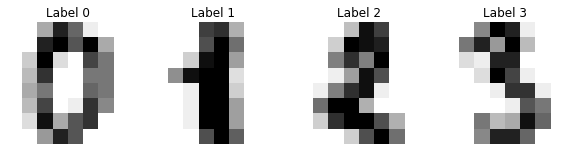

In [3]:
# Show MNIST data
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, images, y):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Label %i" % label)

# PCA visualisation

In [4]:
# PCA transform
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

Text(0.5, 1.0, 'PCA visualisation')

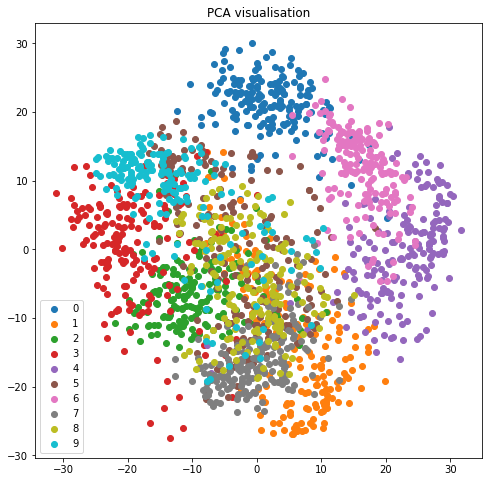

In [5]:
# Visualise PCA with lable colours
plt.figure(figsize=(8, 8))
for i in np.unique(y):
    plt.scatter(X_pca[y == i][:, 0], X_pca[y == i][:, 1], label=str(i))
plt.legend()
plt.title('PCA visualisation')

# t-SNE visualisation

In [6]:
# t-SNE transform
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=10)
X_tsne = tsne.fit_transform(X)

Text(0.5, 1.0, 't-SNE visualisation')

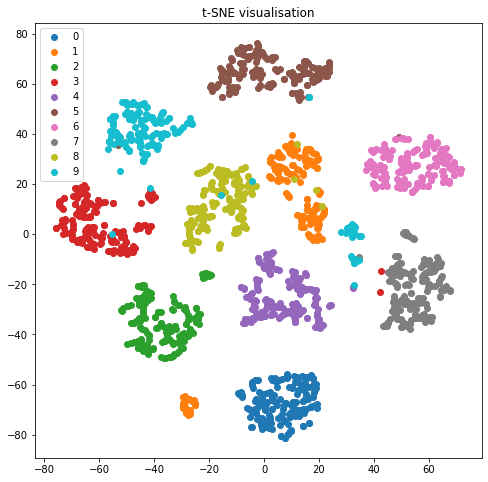

In [7]:
# Visualise t-SNE with lable colours
plt.figure(figsize=(8, 8))
for i in np.unique(y):
    plt.scatter(X_tsne[y == i][:, 0], X_tsne[y == i][:, 1], label=str(i))
plt.legend()
plt.title('t-SNE visualisation')

note:
- Perplexity is the main hyperparameter of t-SNE.
- Perplexity needs some play around before interpretation can be made from the visualisation.
- When local structures do not exist in the original data space, t-SNE visualisation maybe misleading.

Further reading:
- https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding
- https://distill.pub/2016/misread-tsne/